# <b><span style='color:#F1A424'>AutoML - Regression - House Price Prediction </span> </b>

### Disclaimer
The sample code (“Sample Code”) provided is not covered by any Teradata agreements. Please be aware that Teradata has no control over the model responses to such sample code and such response may vary. The use of the model by Teradata is strictly for demonstration purposes and does not constitute any form of certification or endorsement. The sample code is provided “AS IS” and any express or implied warranties, including the implied warranties of merchantability and fitness for a particular purpose, are disclaimed. In no event shall Teradata be liable for any direct, indirect, incidental, special, exemplary, or consequential damages (including, but not limited to, procurement of substitute goods or services; loss of use, data, or profits; or business interruption) sustained by you or a third party, however caused and on any theory of liability, whether in contract, strict liability, or tort arising in any way out of the use of this sample code, even if advised of the possibility of such damage.

## <b> Problem overview:</b>
    


The housing price dataset contains range of features associated with residential properties, including their physical attributes, amenities, and location-related characteristics. It is a common type of dataset used for regression or predictive modeling tasks in the field of real estate or housing market analysis. 

Here are some key details about the Housing dataset:

**Features**:

- `sn`: Serial number or identifier for each housing entry.
- `lotsize`: The size of the lot or land associated with the property, typically measured in square feet.
- `bedrooms`: The number of bedrooms in the house, indicating the sleeping spaces.
- `bathrms`: The number of bathrooms in the house, reflecting the sanitary facilities available.
- `stories`: The number of stories or levels in the house, indicating its vertical structure.
- `driveway`: A binary variable indicating the presence or absence of a driveway for vehicular access.
- `recroom`: A binary variable indicating whether the house has a recreation room.
- `fullbase`: A binary variable indicating the presence or absence of a full basement in the house.
- `gashw`: A binary variable indicating whether the house has a gas hot water heating system.
- `airco`: A binary variable indicating the presence or absence of air conditioning in the house.
- `garagepl`: The number of parking spaces available in the garage.
- `prefarea`: A binary variable indicating whether the house is located in a preferred or desirable area.
- `homestyle`: A categorical variable representing the style or type of the house.

**Target Variable**:

- `price`: The price of the house, representing the cost or value of the property.
        
**Objective**:

The main objective is typically to build a predictive model that can accurately predict prices of residential property based on various features. 

**Challenges**:

- Potential challenges in working with this dataset may include handling missing or skewed data.
- Managing categorical variables like 'homestyle' and addressing the complexities associated with predicting housing prices.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in custom run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

As part of custom AutoML run, we will customize below functionalities:
- Binning on 'bedrooms' feature to get 2 different levels i.e., 'small_house' and 'big_house' based on values.
- Customized ordinal encoding on 'homestyle' and target encoding on 'prefarea'.
- Deletion of id column 'sn' using antiselect.
- Train test split with training size 0.75.
- Outlier filteration with 'percentile' method and customized lower-upper bound.
- Feature scaling with 'std' method.
- Addition of customized value in hyperparameter 'min_node_size' for 'xgboost' model.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data("decisionforestpredict", ["housing_train", "housing_test"])

In [5]:
# Fetching in teradata dataframe
housing_train = DataFrame.from_table("housing_train")
housing_test = DataFrame.from_table("housing_test")

In [6]:
# Housing train dataset
housing_train.head()

sn,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,homestyle
3,49500.0,3060.0,3,1,1,yes,no,no,no,no,0,no,Classic
5,61000.0,6360.0,2,1,1,yes,no,no,no,no,0,no,Eclectic
6,66000.0,4160.0,3,1,1,yes,yes,yes,no,yes,0,no,Eclectic
7,66000.0,3880.0,3,2,2,yes,no,yes,no,no,2,no,Eclectic
9,83800.0,4800.0,3,1,1,yes,yes,yes,no,no,0,no,Eclectic
10,88500.0,5500.0,3,2,4,yes,yes,no,no,yes,1,no,Eclectic
8,69000.0,4160.0,3,1,3,yes,no,no,no,no,0,no,Eclectic
4,60500.0,6650.0,3,1,2,yes,yes,no,no,no,0,no,Eclectic
2,38500.0,4000.0,2,1,1,yes,no,no,no,no,0,no,Classic
1,42000.0,5850.0,3,1,2,yes,no,yes,no,no,1,no,Classic


In [7]:
# Housing train dataset shape
housing_train.shape

(492, 14)

In [8]:
# Housing test dataset
housing_test.head()

sn,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,homestyle
25,42000.0,4960.0,2,1,1,yes,no,no,no,no,0,no,Classic
53,68000.0,9166.0,2,1,1,yes,no,yes,no,yes,2,no,Eclectic
111,43000.0,5076.0,3,1,1,no,no,no,no,no,0,no,Classic
117,93000.0,3760.0,3,1,2,yes,no,no,yes,no,2,no,Eclectic
140,43000.0,3750.0,3,1,2,yes,no,no,no,no,0,no,Classic
142,40000.0,2650.0,3,1,2,yes,no,yes,no,no,1,no,Classic
132,44500.0,3850.0,3,1,2,yes,no,no,no,no,0,no,Classic
38,67000.0,5170.0,3,1,4,yes,no,no,no,yes,0,no,Eclectic
16,37900.0,3185.0,2,1,1,yes,no,no,no,yes,0,no,Classic
13,27000.0,1700.0,3,1,2,yes,no,no,no,no,0,no,Classic


In [9]:
# Housing test dataset shape
housing_test.shape

(46, 14)

In [10]:
AutoML.generate_custom_config("custom_housing")


Generating custom config JSON for AutoML ...

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the index you want to customize:  1



Customizing Feature Engineering Phase ...

Available options for customization of feature engineering phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Missing Value Handling

Index 2: Customize Bincode Encoding

Index 3: Customize String Manipulation

Index 4: Customize Categorical Encoding

Index 5: Customize Mathematical Transformation

Index 6: Customize Nonlinear Transformation

Index 7: Customize Antiselect Features

Index 8: Back to main menu

Index 9: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in feature engineering phase:  2,4,7,8



Customizing Bincode Encoding ...

Provide the following details to customize binning and coding encoding:

Available binning methods with corresponding indices:
Index 1: Equal-Width
Index 2: Variable-Width



Enter the feature or list of features for binning:  bedrooms

Enter the index of corresponding binning method for feature bedrooms:  2

Enter the number of bins for feature bedrooms:  2



Available value type of feature for variable binning with corresponding indices:
Index 1: int
Index 2: float

Provide the range for bin 1 of feature bedrooms: 



Enter the index of corresponding value type of feature bedrooms:  1

Enter the minimum value for bin 1 of feature bedrooms:  0

Enter the maximum value for bin 1 of feature bedrooms:  2

Enter the label for bin 1 of feature bedrooms:  small_house



Provide the range for bin 2 of feature bedrooms: 



Enter the index of corresponding value type of feature bedrooms:  1

Enter the minimum value for bin 2 of feature bedrooms:  3

Enter the maximum value for bin 2 of feature bedrooms:  6

Enter the label for bin 2 of feature bedrooms:  big_house



Available options for generic arguments: 
Index 0: Default
Index 1: volatile
Index 2: persist



Enter the indices for generic arguments :  0



Customization of bincode encoding has been completed successfully.

Customizing Categorical Encoding ...

Provide the following details to customize categorical encoding:

Available categorical encoding methods with corresponding indices:
Index 1: OneHotEncoding
Index 2: OrdinalEncoding
Index 3: TargetEncoding



Enter the list of corresponding index categorical encoding methods you want to use:  2,3

Enter the feature or list of features for OrdinalEncoding:  homestyle

Enter the feature or list of features for TargetEncoding:  prefarea



Available target encoding methods with corresponding indices:
Index 1: CBM_BETA
Index 2: CBM_DIRICHLET
Index 3: CBM_GAUSSIAN_INVERSE_GAMMA



Enter the index of target encoding method for feature prefarea:  3

Enter the response column for target encoding method for feature prefarea:  price



Available options for generic arguments: 
Index 0: Default
Index 1: volatile
Index 2: persist



Enter the indices for generic arguments :  0



Customization of categorical encoding has been completed successfully.

Customizing Antiselect Features ...



Enter the feature or list of features for antiselect:  sn



Available options for generic arguments: 
Index 0: Default
Index 1: volatile
Index 2: persist



Enter the indices for generic arguments :  0



Customization of antiselect features has been completed successfully.

Customization of feature engineering phase has been completed successfully.

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the index you want to customize:  2



Customizing Data Preparation Phase ...

Available options for customization of data preparation phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Data Imbalance Handling

Index 2: Customize Outlier Handling

Index 3: Customize Feature Scaling

Index 4: Back to main menu

Index 5: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in data preparation phase:  1,2



Customizing Data Imbalance Handling ...

Available data sampling methods with corresponding indices:
Index 1: SMOTE
Index 2: NearMiss



Enter the corresponding index data imbalance handling method:  1



Customization of data imbalance handling has been completed successfully.

Customizing Outlier Handling ...

Available outlier detection methods with corresponding indices:
Index 1: percentile
Index 2: tukey
Index 3: carling



Enter the corresponding index oulier handling method:  1

Enter the lower percentile value for outlier handling:  0.15

Enter the upper percentile value for outlier handling:  0.85

Enter the feature or list of features for outlier handling:  bathrms



Available outlier replacement methods with corresponding indices:
Index 1: delete
Index 2: median
Index 3: Any Numeric Value



Enter the index of corresponding replacement method for feature bathrms:  1



Available options for generic arguments: 
Index 0: Default
Index 1: volatile
Index 2: persist



Enter the indices for generic arguments :  0



Customization of outlier handling has been completed successfully.

Available options for customization of data preparation phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Data Imbalance Handling

Index 2: Customize Outlier Handling

Index 3: Customize Feature Scaling

Index 4: Back to main menu

Index 5: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in data preparation phase:  5



Customization of data preparation phase has been completed successfully.

Process of generating custom config file for AutoML has been completed successfully.

'custom_housing.json' file is generated successfully under the current working directory.


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [11]:
# Creating AutoML instance with task type 'Regression'.
# Excluding 'glm', 'svm', and 'knn' models from default model list for training.
# Keeping early stopping metrics threshold to 0.6 for 'R2', early stopping timer threshold to 200 sec
# Using verbose level 2 for detailed loggging
# Passing custom json file to provide customized value for AutoML.

aml = AutoML(task_type="Regression",
             exclude=['glm','svm','knn'],
             verbose=2,
             max_runtime_secs=200,
             stopping_metric='R2',
             stopping_tolerance=0.6,
             custom_config_file='custom_housing.json')


Received below input for customization : 
{
    "BincodeIndicator": true,
    "BincodeParam": {
        "bedrooms": {
            "Type": "Variable-Width",
            "NumOfBins": 2,
            "Bin_1": {
                "min_value": 0,
                "max_value": 2,
                "label": "small_house"
            },
            "Bin_2": {
                "min_value": 3,
                "max_value": 6,
                "label": "big_house"
            }
        }
    },
    "CategoricalEncodingIndicator": true,
    "CategoricalEncodingParam": {
        "OrdinalEncodingIndicator": true,
        "OrdinalEncodingList": [
            "homestyle"
        ],
        "TargetEncodingIndicator": true,
        "TargetEncodingList": {
            "prefarea": {
                "encoder_method": "CBM_GAUSSIAN_INVERSE_GAMMA",
                "response_column": "price"
            }
        }
    },
    "AntiselectIndicator": true,
    "AntiselectParam": {
        "excluded_columns": [
        

Feature Exploration started ...

Data Overview:
Total Rows in the data: 492
Total Columns in the data: 14

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
homestyle,VARCHAR(20) CHARACTER SET LATIN,492,0,0,None,None,None,0.0,100.0
airco,VARCHAR(10) CHARACTER SET LATIN,492,0,0,None,None,None,0.0,100.0
price,FLOAT,492,0,None,0,492,0,0.0,100.0
lotsize,FLOAT,492,0,None,0,492,0,0.0,100.0
fullbase,VARCHAR(10) CHARACTER SET LATIN,492,0,0,None,None,None,0.0,100.0
bathrms,INTEGER,492,0,None,0,492,0,0.0,100.0
recroom,VARCHAR(10) CHARACTER SET LATIN,492,0,0,None,None,None,0.0,100.0
bedrooms,INTEGER,492,0,None,0,492,0,0.0,100.0
driveway,VARCHAR(10) CHARACTER SET LATIN,492,0,0,None,None,None,0.0,100.0
prefarea,VARCHAR(10) CHARACTER SET LATIN,492,0,0,None,None,None,0.0,100.0


            sn       price    lotsize  bedrooms  bathrms  stories  garagepl
func                                                                       
50%    274.000   62000.000   4616.000     3.000    1.000    2.000     0.000
count  492.000     492.000    492.000   492.000  492.000  492.000   492.000
mean   272.943   68100.396   5181.795     2.965    1.293    1.803     0.685
min      1.000   25000.000   1650.000     1.000    1.000    1.000     0.000
max    546.000  190000.000  16200.000     6.000    4.000    4.000     3.000
75%    413.250   82000.000   6370.000     3.000    2.000    2.000     1.000
25%    132.500   49975.000   3600.000     2.000    1.000    1.000     0.000
std    159.501   26472.496   2182.443     0.731    0.510    0.861     0.854

Statistics of Data:


func,sn,price,lotsize,bedrooms,bathrms,stories,garagepl
50%,274,62000,4616,3,1,2,0
count,492,492,492,492,492,492,492
mean,272.943,68100.396,5181.795,2.965,1.293,1.803,0.685
min,1,25000,1650,1,1,1,0
max,546,190000,16200,6,4,4,3
75%,413.25,82000,6370,3,2,2,1
25%,132.5,49975,3600,2,1,1,0
std,159.501,26472.496,2182.443,0.731,0.51,0.861,0.854



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
driveway                  2         
recroom                   2         
fullbase                  2         
gashw                     2         
airco                     2         
prefarea                  2         
homestyle                 3         

No Futile columns found.

Target Column Distribution:


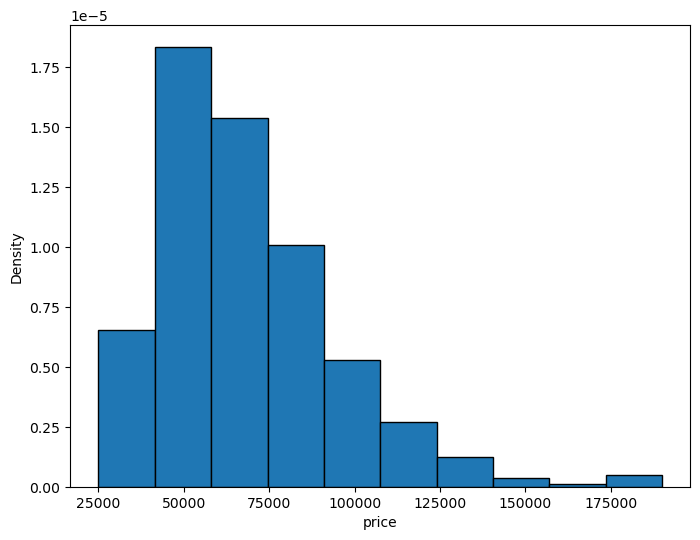

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0    stories           7.113821
1    bathrms           0.203252
2   bedrooms           2.235772
3   garagepl           2.235772
4    lotsize           2.235772
5      price           2.439024


Analysis completed. No action taken.                                                    


price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,homestyle
99000.0,8880.0,3,2,2,yes,no,yes,no,yes,1,no,Eclectic
63900.0,6360.0,2,1,1,yes,no,yes,no,yes,1,no,Eclectic
88000.0,4500.0,3,1,4,yes,no,no,no,yes,0,no,Eclectic
50000.0,3640.0,2,1,1,yes,no,no,no,no,1,no,Classic
48000.0,4120.0,2,1,2,yes,no,no,no,no,0,no,Classic
27000.0,3649.0,2,1,1,yes,no,no,no,no,0,no,Classic
58000.0,4340.0,3,1,1,yes,no,no,no,no,0,no,Eclectic
87000.0,8372.0,3,1,3,yes,no,no,no,yes,2,no,Eclectic
49500.0,5320.0,2,1,1,yes,no,no,no,no,1,yes,Classic
70100.0,4200.0,3,1,2,yes,no,no,no,no,1,no,Eclectic


Analysis indicates all categorical columns are significant. No action Needed.            


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Proceeding with default option for missing value imputation.                             
Proceeding with default option for handling remaining missing values.                    


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


No information provided for Equal-Width Transformation.                                  


,ColumnName,MinValue,MaxValue,Label
0,bedrooms,0,2,small_house
1,bedrooms,3,6,big_house


bathrms,stories,gashw,airco,fullbase,id,homestyle,lotsize,garagepl,prefarea,driveway,recroom,price,bedrooms
3,2,no,no,yes,194,bungalow,5960.0,1,no,yes,yes,117000.0,big_house  
3,2,no,no,yes,291,Eclectic,3300.0,0,no,yes,no,79000.0,big_house  
3,4,no,yes,no,76,bungalow,8580.0,2,yes,yes,no,145000.0,big_house  
3,2,no,no,no,92,Classic,3630.0,0,no,no,yes,38000.0,big_house  
3,2,yes,no,yes,66,bungalow,6000.0,2,no,yes,yes,138300.0,big_house  
3,2,no,no,no,222,bungalow,16200.0,0,no,yes,no,145000.0,big_house  
3,2,no,no,yes,118,Eclectic,4410.0,2,no,yes,no,71000.0,big_house  
1,1,no,yes,no,195,Classic,2684.0,1,no,yes,no,46000.0,small_house
1,2,no,no,no,83,Classic,4370.0,0,no,yes,no,46000.0,big_house  
1,2,no,no,yes,242,Classic,3970.0,0,no,yes,no,32500.0,big_house  


Skipping customized string manipulation.                                                 


bathrms,stories,gashw,airco,fullbase,id,lotsize,bedrooms,garagepl,prefarea,driveway,recroom,price,homestyle
3,4,no,yes,no,76,8580.0,big_house  ,2,yes,yes,no,145000.0,0
3,2,no,no,no,73,2610.0,big_house  ,0,no,no,no,60000.0,2
3,2,no,no,no,222,16200.0,big_house  ,0,no,yes,no,145000.0,0
3,2,no,no,yes,118,4410.0,big_house  ,2,no,yes,no,71000.0,2
3,2,no,no,yes,291,3300.0,big_house  ,0,no,yes,no,79000.0,2
3,2,no,no,yes,194,5960.0,big_house  ,1,no,yes,yes,117000.0,0
3,2,no,no,no,510,8580.0,big_house  ,2,no,yes,no,92000.0,2
1,1,no,no,no,206,4320.0,big_house  ,0,yes,yes,no,67000.0,2
1,2,no,no,yes,169,5010.0,big_house  ,0,no,yes,no,66000.0,2
1,2,no,yes,no,53,4400.0,big_house  ,2,yes,yes,no,79500.0,2


prefarea,bathrms,stories,gashw,airco,fullbase,id,homestyle,lotsize,bedrooms,garagepl,driveway,recroom,price
83851.72413793103,1,1,no,yes,no,96,2,10240.0,small_house,2,yes,no,68000.0
83851.72413793103,1,1,no,no,yes,233,2,6900.0,big_house  ,0,yes,yes,78900.0
83851.72413793103,1,1,no,yes,yes,185,2,6360.0,big_house  ,2,yes,yes,82000.0
83851.72413793103,1,2,no,yes,yes,375,2,5136.0,big_house  ,0,yes,yes,80000.0
83851.72413793103,1,2,no,yes,yes,378,2,8400.0,big_house  ,2,yes,yes,75000.0
83851.72413793103,1,3,no,yes,no,285,2,6100.0,big_house  ,0,yes,yes,78000.0
62906.33597883598,1,1,no,no,yes,211,2,3540.0,small_house,0,no,yes,72000.0
62906.33597883598,1,1,no,no,no,247,1,3360.0,small_house,1,yes,no,30000.0
62906.33597883598,1,1,no,no,no,395,1,2700.0,small_house,0,no,no,42000.0
62906.33597883598,1,2,no,yes,yes,55,1,3180.0,big_house  ,0,yes,no,47000.0


['gashw', 'airco', 'fullbase', 'bedrooms', 'driveway', 'recroom']


prefarea,bathrms,stories,gashw_0,gashw_1,airco_0,airco_1,fullbase_0,fullbase_1,id,homestyle,lotsize,bedrooms_0,bedrooms_1,garagepl,driveway_0,driveway_1,recroom_0,recroom_1,price
83851.72413793103,1,1,1,0,0,1,0,1,185,2,6360.0,1,0,2,0,1,0,1,82000.0
83851.72413793103,1,2,1,0,0,1,0,1,378,2,8400.0,1,0,2,0,1,0,1,75000.0
83851.72413793103,1,3,1,0,0,1,1,0,285,2,6100.0,1,0,0,0,1,0,1,78000.0
83851.72413793103,1,1,1,0,0,1,0,1,139,2,11175.0,1,0,1,0,1,1,0,100000.0
83851.72413793103,1,2,1,0,1,0,0,1,58,2,3400.0,1,0,2,0,1,1,0,61100.0
83851.72413793103,1,1,1,0,1,0,1,0,464,2,6040.0,1,0,2,0,1,1,0,69000.0
62906.33597883598,1,1,1,0,1,0,1,0,395,1,2700.0,0,1,0,1,0,1,0,42000.0
62906.33597883598,1,1,1,0,1,0,1,0,119,2,6720.0,1,0,0,0,1,1,0,70000.0
62906.33597883598,1,2,1,0,1,0,1,0,144,1,4840.0,0,1,0,0,1,1,0,35000.0
62906.33597883598,1,1,1,0,0,1,1,0,234,0,8880.0,0,1,1,0,1,1,0,101000.0


Skipping customized mathematical transformation.                                         


Skipping customized non-linear transformation.                                           


No information provided for performing customized feature scaling. Proceeding with default option.


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0         id           9.756098
1    lotsize           9.552846
2    bathrms           2.235772
3   garagepl           2.235772
4      price           8.739837


['recroom_1', 'stories', 'gashw_0', 'bedrooms_0', 'garagepl', 'fullbase_1', 'bathrms', 'airco_0', 'recroom_0', 'airco_1', 'driveway_1', 'gashw_1', 'bedrooms_1', 'homestyle', 'fullbase_0', 'driveway_0', 'prefarea', 'lotsize']


['stories', 'garagepl', 'bathrms', 'homestyle', 'prefarea', 'lotsize']


recroom_1,airco_0,recroom_0,gashw_0,airco_1,id,driveway_1,gashw_1,bedrooms_1,fullbase_0,bedrooms_0,fullbase_1,price,driveway_0,stories,garagepl,bathrms,homestyle,prefarea,lotsize
0,1,1,1,0,10,0,0,1,0,0,1,54500.0,1,-0.9243489557048288,-0.7962575788492099,1.7248787237282124,0.7342974433930187,-0.5541346563708683,-0.9405595540664473
0,0,1,1,1,12,1,0,1,0,0,1,63900.0,0,-0.9243489557048288,0.38950061132561975,-0.5797509043642046,0.7342974433930187,-0.5541346563708683,0.5744513081034206
0,0,1,1,1,13,1,0,0,0,1,1,99000.0,0,0.24261127446320968,0.38950061132561975,1.7248787237282124,0.7342974433930187,-0.5541346563708683,1.7638056298068683
0,1,1,1,0,14,1,0,1,1,0,0,48000.0,0,0.24261127446320968,-0.7962575788492099,-0.5797509043642046,-0.7435145661134329,-0.5541346563708683,-0.48275253341075514
0,0,1,1,1,16,1,0,0,1,1,0,87000.0,0,1.4095715046312483,1.5752588015004494,-0.5797509043642046,0.7342974433930187,-0.5541346563708683,1.5240469014634748
0,0,1,1,1,17,0,0,0,0,1,1,57000.0,1,0.24261127446320968,-0.7962575788492099,1.7248787237282124,0.7342974433930187,-0.5541346563708683,-0.303405453153886
0,1,1,1,0,15,1,0,1,1,0,0,49500.0,0,-0.9243489557048288,0.38950061132561975,-0.5797509043642046,-0.7435145661134329,1.8046155180928998,0.08360666740041044
0,1,1,1,0,11,1,0,0,1,1,0,80000.0,0,0.24261127446320968,0.38950061132561975,1.7248787237282124,0.7342974433930187,-0.5541346563708683,2.5283905509019418
0,1,1,1,0,9,1,0,1,1,0,0,50000.0,0,-0.9243489557048288,0.38950061132561975,-0.5797509043642046,-0.7435145661134329,-0.5541346563708683,-0.7092962137352213
0,1,1,1,0,8,1,0,0,1,1,0,58000.0,0,-0.9243489557048288,-0.7962575788492099,-0.5797509043642046,0.7342974433930187,-0.5541346563708683,-0.37892001326204144


['stories', 'garagepl', 'bathrms', 'airco_0', 'bedrooms_1', 'homestyle', 'fullbase_0', 'prefarea', 'lotsize']


['r_stories', 'r_garagepl', 'r_bathrms', 'r_homestyle', 'r_prefarea', 'r_lotsize']


r_bedrooms_1,r_fullbase_0,id,price,r_airco_0,r_stories,r_garagepl,r_bathrms,r_homestyle,r_prefarea,r_lotsize
1,0,10,54500.0,1,-0.9243489557048288,-0.7962575788492099,1.7248787237282124,0.7342974433930187,-0.5541346563708683,-0.9405595540664473
1,0,12,63900.0,0,-0.9243489557048288,0.38950061132561975,-0.5797509043642046,0.7342974433930187,-0.5541346563708683,0.5744513081034206
0,0,13,99000.0,0,0.24261127446320968,0.38950061132561975,1.7248787237282124,0.7342974433930187,-0.5541346563708683,1.7638056298068683
1,1,14,48000.0,1,0.24261127446320968,-0.7962575788492099,-0.5797509043642046,-0.7435145661134329,-0.5541346563708683,-0.48275253341075514
0,1,16,87000.0,0,1.4095715046312483,1.5752588015004494,-0.5797509043642046,0.7342974433930187,-0.5541346563708683,1.5240469014634748
0,0,17,57000.0,0,0.24261127446320968,-0.7962575788492099,1.7248787237282124,0.7342974433930187,-0.5541346563708683,-0.303405453153886
1,1,15,49500.0,1,-0.9243489557048288,0.38950061132561975,-0.5797509043642046,-0.7435145661134329,1.8046155180928998,0.08360666740041044
0,1,11,80000.0,1,0.24261127446320968,0.38950061132561975,1.7248787237282124,0.7342974433930187,-0.5541346563708683,2.5283905509019418
1,1,9,50000.0,1,-0.9243489557048288,0.38950061132561975,-0.5797509043642046,-0.7435145661134329,-0.5541346563708683,-0.7092962137352213
0,1,8,58000.0,1,-0.9243489557048288,-0.7962575788492099,-0.5797509043642046,0.7342974433930187,-0.5541346563708683,-0.37892001326204144


['prefarea', 'bathrms', 'stories', 'homestyle', 'lotsize', 'garagepl']


recroom_1,airco_0,recroom_0,gashw_0,airco_1,id,driveway_1,gashw_1,bedrooms_1,fullbase_0,bedrooms_0,fullbase_1,price,driveway_0,prefarea,bathrms,stories,homestyle,lotsize,garagepl
1,0,0,1,1,285,1,0,0,1,1,0,78000.0,0,1.8046155180928782,-0.5797509043642026,1.409571504631246,0.7342974433930172,0.4517401479276683,-0.7962575788492109
0,1,1,1,0,58,1,0,0,0,1,1,61100.0,0,1.8046155180928782,-0.5797509043642026,0.24261127446320932,0.7342974433930172,-0.822568053897455,1.5752588015004514
0,1,1,1,0,464,1,0,0,1,1,0,69000.0,0,1.8046155180928782,-0.5797509043642026,-0.9243489557048274,0.7342974433930172,0.42342218788711006,1.5752588015004514
0,1,1,1,0,393,1,0,0,0,1,1,86900.0,0,1.8046155180928782,-0.5797509043642026,-0.9243489557048274,0.7342974433930172,2.1130604703070883,1.5752588015004514
0,1,1,1,0,283,1,0,0,1,1,0,58000.0,0,1.8046155180928782,-0.5797509043642026,0.24261127446320932,0.7342974433930172,-0.3883593332755611,1.5752588015004514
0,1,1,1,0,387,1,0,0,0,1,1,47000.0,0,1.8046155180928782,-0.5797509043642026,0.24261127446320932,-0.7435145661134314,-1.4148853847457994,-0.7962575788492109
0,1,1,1,0,144,1,0,1,1,0,0,35000.0,0,-0.5541346563708951,-0.5797509043642026,0.24261127446320932,-0.7435145661134314,-0.1429370129240559,-0.7962575788492109
0,0,1,1,1,411,1,0,0,1,1,0,83000.0,0,-0.5541346563708951,-0.5797509043642026,1.409571504631246,0.7342974433930172,-0.16181565295109474,-0.7962575788492109
0,1,1,1,0,487,1,0,0,1,1,0,38000.0,0,-0.5541346563708951,-0.5797509043642026,-0.9243489557048274,-0.7435145661134314,-1.105747654303038,-0.7962575788492109
0,1,1,1,0,35,1,0,1,1,0,0,45000.0,0,-0.5541346563708951,-0.5797509043642026,-0.9243489557048274,-0.7435145661134314,-0.7989697538636564,-0.7962575788492109


['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9']


                                                                                          
Skipping customized hyperparameter tuning


response_column : price                                                                                                                               
name : xgboost
model_type : Regression
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1, 0.2, 0.3)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.01, 0.05, 0.1)
max_depth : (5, 3, 4, 7, 8)
min_node_size : (1, 2, 3, 4)
iter_num : (10, 20, 30, 40)
seed : 42
Total number of models for xgboost : 10240
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : price
name : decision_forest
tree_type : Regression
min_impurity : (0.0, 0.1, 0.2, 0.3)
max_depth : (5, 3, 4, 7, 8)
min_node_size : (1, 2, 3, 4)
num_trees : (-1, 20, 30, 40)
seed : 42
Total number of models for decision_forest : 320
-------------------------------------------------------------------------------------

,RANK,MODEL_ID,FEATURE_SELECTION,MAE,MSE,MSLE,MAPE,MPE,RMSE,RMSLE,ME,R2,EV,MPD,MGD,ADJUSTED_R2
0,1,XGBOOST_1,rfe,8427.249621,1.394711e+08,0.024186,12.256896,-0.226853,11809.788825,0.155517,44860.075880,0.831416,0.835116,1668.854740,0.024415,0.828195
1,2,XGBOOST_0,lasso,8233.900404,1.412864e+08,0.024208,12.021986,0.890327,11886.393576,0.155589,49616.394501,0.829222,0.836897,1676.436224,0.024553,0.822569
2,3,XGBOOST_3,lasso,8233.900404,1.412864e+08,0.024208,12.021986,0.890327,11886.393576,0.155589,49616.394501,0.829222,0.836897,1676.436224,0.024553,0.822569
3,4,XGBOOST_2,pca,8762.454560,1.721874e+08,0.030721,13.421626,-2.003179,13122.018442,0.175275,60568.021287,0.791871,0.794088,2107.466538,0.030929,0.787443
4,5,DECISIONFOREST_1,rfe,9683.028747,2.273851e+08,0.032219,13.522362,0.032294,15079.293192,0.179496,71500.000000,0.725152,0.732519,2515.412163,0.032992,0.719900
5,6,DECISIONFOREST_0,lasso,9844.712596,2.469670e+08,0.033416,13.614288,0.124220,15715.184984,0.182801,71500.000000,0.701482,0.709846,2686.399136,0.034488,0.689852
6,7,DECISIONFOREST_3,lasso,10262.567624,2.878648e+08,0.036579,13.965556,-0.144662,16966.577888,0.191257,71945.000000,0.652048,0.668895,3111.956207,0.038856,0.638491
7,8,DECISIONFOREST_2,pca,11664.438993,3.793982e+08,0.056060,16.069311,1.031014,19478.147399,0.236771,84146.052632,0.541408,0.563668,4628.203132,0.064916,0.531651


In [12]:
# Fitting train data
aml.fit(housing_train,housing_train.price)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [13]:
# Fetching Leaderboard
aml.leaderboard()

,RANK,MODEL_ID,FEATURE_SELECTION,MAE,MSE,MSLE,MAPE,MPE,RMSE,RMSLE,ME,R2,EV,MPD,MGD,ADJUSTED_R2
0,1,XGBOOST_1,rfe,8427.249621,1.394711e+08,0.024186,12.256896,-0.226853,11809.788825,0.155517,44860.075880,0.831416,0.835116,1668.854740,0.024415,0.828195
1,2,XGBOOST_0,lasso,8233.900404,1.412864e+08,0.024208,12.021986,0.890327,11886.393576,0.155589,49616.394501,0.829222,0.836897,1676.436224,0.024553,0.822569
2,3,XGBOOST_3,lasso,8233.900404,1.412864e+08,0.024208,12.021986,0.890327,11886.393576,0.155589,49616.394501,0.829222,0.836897,1676.436224,0.024553,0.822569
3,4,XGBOOST_2,pca,8762.454560,1.721874e+08,0.030721,13.421626,-2.003179,13122.018442,0.175275,60568.021287,0.791871,0.794088,2107.466538,0.030929,0.787443
4,5,DECISIONFOREST_1,rfe,9683.028747,2.273851e+08,0.032219,13.522362,0.032294,15079.293192,0.179496,71500.000000,0.725152,0.732519,2515.412163,0.032992,0.719900
5,6,DECISIONFOREST_0,lasso,9844.712596,2.469670e+08,0.033416,13.614288,0.124220,15715.184984,0.182801,71500.000000,0.701482,0.709846,2686.399136,0.034488,0.689852
6,7,DECISIONFOREST_3,lasso,10262.567624,2.878648e+08,0.036579,13.965556,-0.144662,16966.577888,0.191257,71945.000000,0.652048,0.668895,3111.956207,0.038856,0.638491
7,8,DECISIONFOREST_2,pca,11664.438993,3.793982e+08,0.056060,16.069311,1.031014,19478.147399,0.236771,84146.052632,0.541408,0.563668,4628.203132,0.064916,0.531651


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [14]:
# Fetching best performing model for dataset
aml.leader()

,RANK,MODEL_ID,FEATURE_SELECTION,MAE,MSE,MSLE,MAPE,MPE,RMSE,RMSLE,ME,R2,EV,MPD,MGD,ADJUSTED_R2
0,1,XGBOOST_1,rfe,8427.249621,1.394711e+08,0.024186,12.256896,-0.226853,11809.788825,0.155517,44860.07588,0.831416,0.835116,1668.85474,0.024415,0.828195


## <b><span style='color:#F1A424'>| 5.</span> Get Hyperparameter for Trained Model : </b>

In [15]:
aml.model_hyperparameters(rank=2)

{'response_column': 'price',
 'name': 'xgboost',
 'model_type': 'Regression',
 'column_sampling': 1,
 'min_impurity': 0.0,
 'lambda1': 0.01,
 'shrinkage_factor': 0.5,
 'max_depth': 5,
 'min_node_size': 1,
 'iter_num': 10,
 'seed': 42,
 'persist': False}

In [16]:
aml.model_hyperparameters(rank=3)

{'response_column': 'price',
 'name': 'xgboost',
 'model_type': 'Regression',
 'column_sampling': 1,
 'min_impurity': 0.0,
 'lambda1': 0.01,
 'shrinkage_factor': 0.5,
 'max_depth': 5,
 'min_node_size': 1,
 'iter_num': 20,
 'seed': 42,
 'persist': False}

## <b><span style='color:#F1A424'>| 6.</span> Generate Prediction and Performance Metrics : </b>

In [17]:
# Generating prediction on test data
prediction = aml.predict(housing_test)

Data Transformation started ...


bathrms,stories,gashw,airco,sn,fullbase,id,homestyle,lotsize,garagepl,prefarea,driveway,recroom,price,bedrooms
1,1,no,no,443,no,51,Eclectic,3520.0,0,yes,yes,no,65000.0,big_house  
1,2,no,no,469,no,8,Eclectic,2176.0,0,yes,yes,yes,55000.0,small_house
1,2,no,yes,440,no,19,Eclectic,6862.0,2,yes,yes,no,69000.0,big_house  
1,1,no,yes,401,yes,40,Eclectic,7410.0,2,yes,yes,yes,92500.0,big_house  
1,1,no,no,25,no,48,Classic,4960.0,0,no,yes,no,42000.0,small_house
1,1,no,no,251,yes,14,Classic,3450.0,2,no,yes,no,48500.0,big_house  
1,1,no,yes,16,no,23,Classic,3185.0,0,no,yes,no,37900.0,small_house
1,1,no,no,301,no,9,Eclectic,4080.0,0,no,yes,no,55000.0,small_house
1,1,no,no,411,yes,33,Eclectic,9000.0,1,yes,yes,no,90000.0,big_house  
1,2,no,yes,161,no,49,Eclectic,3162.0,1,no,yes,no,63900.0,big_house  


prefarea,bathrms,stories,gashw,airco,sn,fullbase,id,homestyle,lotsize,bedrooms,garagepl,driveway,recroom,price
62906.33597883598,1,1,no,yes,53,yes,11,2,9166.0,small_house,2,yes,no,68000.0
62906.33597883598,1,2,no,no,140,no,43,1,3750.0,big_house  ,0,yes,no,43000.0
62906.33597883598,1,2,no,no,255,no,15,2,4360.0,big_house  ,0,yes,no,61000.0
62906.33597883598,1,2,no,no,364,yes,16,2,10700.0,big_house  ,0,yes,yes,72000.0
62906.33597883598,1,2,yes,no,117,no,37,2,3760.0,big_house  ,2,yes,no,93000.0
62906.33597883598,1,2,no,no,237,no,53,1,3630.0,big_house  ,3,yes,no,43000.0
83851.72413793103,1,1,no,yes,401,yes,40,2,7410.0,big_house  ,2,yes,yes,92500.0
83851.72413793103,1,1,no,no,411,yes,33,2,9000.0,big_house  ,1,yes,no,90000.0
83851.72413793103,1,2,no,no,463,yes,13,1,2610.0,big_house  ,0,yes,no,49000.0
83851.72413793103,1,3,no,no,408,yes,22,2,6420.0,big_house  ,0,yes,no,87500.0


prefarea,bathrms,stories,gashw_0,gashw_1,airco_0,airco_1,sn,fullbase_0,fullbase_1,id,homestyle,lotsize,bedrooms_0,bedrooms_1,garagepl,driveway_0,driveway_1,recroom_0,recroom_1,price
62906.33597883598,1,2,1,0,1,0,255,1,0,15,2,4360.0,1,0,0,0,1,1,0,61000.0
62906.33597883598,1,2,0,1,1,0,117,1,0,37,2,3760.0,1,0,2,0,1,1,0,93000.0
62906.33597883598,1,2,1,0,1,0,237,1,0,53,1,3630.0,1,0,3,0,1,1,0,43000.0
62906.33597883598,1,2,1,0,1,0,13,1,0,17,1,1700.0,1,0,0,0,1,1,0,27000.0
62906.33597883598,1,2,0,1,1,0,198,1,0,20,1,4350.0,1,0,1,1,0,1,0,40500.0
62906.33597883598,1,1,1,0,1,0,234,1,0,36,1,3970.0,0,1,0,1,0,1,0,32500.0
83851.72413793103,1,2,1,0,1,0,463,0,1,13,1,2610.0,1,0,0,0,1,1,0,49000.0
83851.72413793103,1,1,1,0,1,0,441,1,0,39,2,3520.0,1,0,2,0,1,1,0,51900.0
83851.72413793103,1,2,1,0,1,0,469,1,0,8,2,2176.0,0,1,0,0,1,0,1,55000.0
83851.72413793103,1,1,1,0,1,0,472,0,1,27,2,2787.0,1,0,0,0,1,1,0,60500.0


prefarea,bathrms,stories,gashw_0,gashw_1,airco_0,airco_1,fullbase_0,fullbase_1,id,homestyle,lotsize,bedrooms_0,bedrooms_1,garagepl,driveway_0,driveway_1,recroom_0,recroom_1,price
62906.33597883598,1,2,1,0,1,0,1,0,15,2,4360.0,1,0,0,0,1,1,0,61000.0
62906.33597883598,1,2,0,1,1,0,1,0,37,2,3760.0,1,0,2,0,1,1,0,93000.0
62906.33597883598,1,2,1,0,1,0,1,0,53,1,3630.0,1,0,3,0,1,1,0,43000.0
62906.33597883598,1,2,1,0,1,0,1,0,17,1,1700.0,1,0,0,0,1,1,0,27000.0
62906.33597883598,1,2,0,1,1,0,1,0,20,1,4350.0,1,0,1,1,0,1,0,40500.0
62906.33597883598,1,1,1,0,1,0,1,0,36,1,3970.0,0,1,0,1,0,1,0,32500.0
83851.72413793103,1,2,1,0,1,0,0,1,13,1,2610.0,1,0,0,0,1,1,0,49000.0
83851.72413793103,1,1,1,0,1,0,1,0,39,2,3520.0,1,0,2,0,1,1,0,51900.0
83851.72413793103,1,2,1,0,1,0,1,0,8,2,2176.0,0,1,0,0,1,0,1,55000.0
83851.72413793103,1,1,1,0,1,0,0,1,27,2,2787.0,1,0,0,0,1,1,0,60500.0


id,recroom_1,stories,gashw_0,bedrooms_0,garagepl,fullbase_1,bathrms,airco_0,recroom_0,airco_1,driveway_1,gashw_1,bedrooms_1,homestyle,fullbase_0,driveway_0,prefarea,lotsize,price
24,1,1,1,0,0,1,2,1,0,0,1,0,1,2,0,0,62906.336,4100.0,64900.0
32,1,1,1,1,0,1,1,0,0,1,1,0,0,2,0,0,83851.7241,6825.0,77500.0
8,1,2,1,0,0,0,1,1,0,0,1,0,1,2,1,0,83851.7241,2176.0,55000.0
27,0,1,1,1,0,1,1,1,1,0,1,0,0,2,0,0,83851.7241,2787.0,60500.0
21,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,0,83851.7241,2398.0,44555.0
22,0,3,1,1,0,1,1,1,1,0,1,0,0,2,0,0,83851.7241,6420.0,87500.0
11,0,1,1,0,2,1,1,0,1,1,1,0,1,2,0,0,62906.336,9166.0,68000.0
43,0,2,1,1,0,0,1,1,1,0,1,0,0,1,1,0,62906.336,3750.0,43000.0
15,0,2,1,1,0,0,1,1,1,0,1,0,0,2,1,0,62906.336,4360.0,61000.0
37,0,2,0,1,2,0,1,1,1,0,1,1,0,2,1,0,62906.336,3760.0,93000.0


recroom_1,airco_0,recroom_0,gashw_0,airco_1,id,driveway_1,gashw_1,bedrooms_1,fullbase_0,bedrooms_0,fullbase_1,price,driveway_0,stories,garagepl,bathrms,homestyle,prefarea,lotsize
0,1,1,1,0,21,1,0,0,1,1,0,44555.0,0,-0.9243489557048288,-0.7962575788492099,-0.5797509043642046,-0.7435145661134329,1.8046155180928998,-1.2954779865747776
0,0,1,1,1,11,1,0,1,0,0,1,68000.0,0,-0.9243489557048288,1.5752588015004494,-0.5797509043642046,0.7342974433930187,-0.5541346563708683,1.898787906000196
0,1,1,1,0,43,1,0,0,1,1,0,43000.0,0,0.24261127446320968,-0.7962575788492099,-0.5797509043642046,-0.7435145661134329,-0.5541346563708683,-0.6573799536608644
0,1,1,1,0,15,1,0,0,1,1,0,61000.0,0,0.24261127446320968,-0.7962575788492099,-0.5797509043642046,0.7342974433930187,-0.5541346563708683,-0.369480693248522
0,1,1,1,0,53,1,0,0,1,1,0,43000.0,0,0.24261127446320968,2.761016991675279,-0.5797509043642046,-0.7435145661134329,-0.5541346563708683,-0.714015873741981
0,1,1,1,0,17,1,0,0,1,1,0,27000.0,0,0.24261127446320968,-0.7962575788492099,-0.5797509043642046,-0.7435145661134329,-0.5541346563708683,-1.6249102550466057
1,0,0,1,1,40,1,0,0,0,1,1,92500.0,0,-0.9243489557048288,1.5752588015004494,-0.5797509043642046,0.7342974433930187,1.8046155180928998,1.0700156088131905
1,1,0,1,0,35,0,0,0,0,1,1,78500.0,1,0.24261127446320968,0.38950061132561975,1.7248787237282124,0.7342974433930187,-0.5541346563708683,-1.0977242322915457
1,1,0,1,0,24,1,0,1,0,0,1,64900.0,0,-0.9243489557048288,-0.7962575788492099,1.7248787237282124,0.7342974433930187,-0.5541346563708683,-0.4921918534242745
1,1,0,1,0,16,1,0,0,0,1,1,72000.0,0,0.24261127446320968,-0.7962575788492099,-0.5797509043642046,0.7342974433930187,-0.5541346563708683,2.622783751037136


id,stories,garagepl,bathrms,airco_0,bedrooms_1,homestyle,fullbase_0,prefarea,lotsize,price
24,1,0,2,1,1,2,0,62906.336,4100.0,64900.0
32,1,0,1,0,0,2,0,83851.7241,6825.0,77500.0
8,2,0,1,1,1,2,1,83851.7241,2176.0,55000.0
27,1,0,1,1,0,2,0,83851.7241,2787.0,60500.0
21,1,0,1,1,0,1,1,83851.7241,2398.0,44555.0
22,3,0,1,1,0,2,0,83851.7241,6420.0,87500.0
11,1,2,1,0,1,2,0,62906.336,9166.0,68000.0
43,2,0,1,1,0,1,1,62906.336,3750.0,43000.0
15,2,0,1,1,0,2,1,62906.336,4360.0,61000.0
37,2,2,1,1,0,2,1,62906.336,3760.0,93000.0


r_bedrooms_1,r_fullbase_0,id,price,r_airco_0,r_stories,r_garagepl,r_bathrms,r_homestyle,r_prefarea,r_lotsize
1,0,24,64900.0,1,-0.9243489557048288,-0.7962575788492099,1.7248787237282124,0.7342974433930187,-0.5541346563708683,-0.4921918534242745
0,0,32,77500.0,0,-0.9243489557048288,-0.7962575788492099,-0.5797509043642046,0.7342974433930187,1.8046155180928998,0.7939154984177472
1,1,8,55000.0,1,0.24261127446320968,-0.7962575788492099,-0.5797509043642046,0.7342974433930187,1.8046155180928998,-1.4002544387248432
0,0,27,60500.0,1,-0.9243489557048288,-0.7962575788492099,-0.5797509043642046,0.7342974433930187,1.8046155180928998,-1.1118832123118247
0,1,21,44555.0,1,-0.9243489557048288,-0.7962575788492099,-0.5797509043642046,-0.7435145661134329,1.8046155180928998,-1.2954779865747776
0,0,22,87500.0,1,1.4095715046312483,-0.7962575788492099,-0.5797509043642046,0.7342974433930187,1.8046155180928998,0.6027692681439788
1,0,11,68000.0,0,-0.9243489557048288,1.5752588015004494,-0.5797509043642046,0.7342974433930187,-0.5541346563708683,1.898787906000196
0,1,43,43000.0,1,0.24261127446320968,-0.7962575788492099,-0.5797509043642046,-0.7435145661134329,-0.5541346563708683,-0.6573799536608644
0,1,15,61000.0,1,0.24261127446320968,-0.7962575788492099,-0.5797509043642046,0.7342974433930187,-0.5541346563708683,-0.369480693248522
0,1,37,93000.0,1,0.24261127446320968,1.5752588015004494,-0.5797509043642046,0.7342974433930187,-0.5541346563708683,-0.6526602936541048


recroom_1,airco_0,recroom_0,gashw_0,airco_1,id,driveway_1,gashw_1,bedrooms_1,fullbase_0,bedrooms_0,fullbase_1,price,driveway_0,prefarea,bathrms,stories,homestyle,lotsize,garagepl
1,1,0,1,0,24,1,0,1,0,0,1,64900.0,0,-0.5541346539875237,1.7248787237282066,-0.9243489557048274,0.7342974433930172,-0.49219185342427485,-0.7962575788492109
1,0,0,1,1,32,1,0,0,0,1,1,77500.0,0,1.804615513821303,-0.5797509043642026,-0.9243489557048274,0.7342974433930172,0.7939154984177478,-0.7962575788492109
1,1,0,1,0,8,1,0,1,1,0,0,55000.0,0,1.804615513821303,-0.5797509043642026,0.24261127446320932,0.7342974433930172,-1.4002544387248441,-0.7962575788492109
0,1,1,1,0,27,1,0,0,0,1,1,60500.0,0,1.804615513821303,-0.5797509043642026,-0.9243489557048274,0.7342974433930172,-1.1118832123118256,-0.7962575788492109
0,1,1,1,0,21,1,0,0,1,1,0,44555.0,0,1.804615513821303,-0.5797509043642026,-0.9243489557048274,-0.7435145661134314,-1.2954779865747785,-0.7962575788492109
0,1,1,1,0,22,1,0,0,0,1,1,87500.0,0,1.804615513821303,-0.5797509043642026,1.409571504631246,0.7342974433930172,0.6027692681439792,-0.7962575788492109
0,0,1,1,1,11,1,0,1,0,0,1,68000.0,0,-0.5541346539875237,-0.5797509043642026,-0.9243489557048274,0.7342974433930172,1.8987879060001973,1.5752588015004514
0,1,1,1,0,43,1,0,0,1,1,0,43000.0,0,-0.5541346539875237,-0.5797509043642026,0.24261127446320932,-0.7435145661134314,-0.6573799536608649,-0.7962575788492109
0,1,1,1,0,15,1,0,0,1,1,0,61000.0,0,-0.5541346539875237,-0.5797509043642026,0.24261127446320932,0.7342974433930172,-0.36948069324852223,-0.7962575788492109
0,1,1,0,0,37,1,1,0,1,1,0,93000.0,0,-0.5541346539875237,-0.5797509043642026,0.24261127446320932,0.7342974433930172,-0.6526602936541052,1.5752588015004514


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,price
0,40,1.517005,2.635827,-0.254247,0.423657,-0.071790,-0.699173,1.123907,0.539062,-0.023292,0.589272,92500.0
1,27,-0.907076,1.115731,-1.753948,1.240695,0.341903,-0.906526,-0.000200,-0.165580,-0.384095,-0.464056,60500.0
2,35,0.199440,-0.655693,-0.973420,-1.287750,1.822717,-0.705320,0.523943,-0.663558,-0.058868,1.033697,78500.0
3,51,-0.831862,0.983331,-1.367625,1.188594,-0.213138,-0.572543,-0.901387,0.190808,-0.489312,0.225768,65000.0
4,24,-0.537790,0.121912,-0.965847,-0.607395,2.236753,0.806179,0.160764,-0.209506,1.265151,0.373994,64900.0
5,21,-0.851571,0.134084,-0.639709,2.122880,0.145022,-0.935130,-0.694137,0.133201,-0.479635,0.151287,44555.0
6,16,0.634760,1.141951,-0.301314,-0.451965,-0.887044,2.253530,1.215956,-1.351005,0.170636,0.298380,72000.0
7,22,0.788204,0.450834,-1.910249,0.856887,-1.306560,-0.058988,0.067773,-0.863751,0.045674,-0.688628,87500.0
8,32,0.441422,1.783878,-1.511197,1.200858,-0.102227,0.551105,1.190928,0.583395,-0.100689,0.490966,77500.0
9,11,0.665806,2.229285,1.326236,-0.984332,-0.103284,0.660512,0.754063,0.745793,0.443762,-0.770841,68000.0


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 15/15            

Following model is being picked for evaluation:
Model ID : XGBOOST_1 
Feature Selection Method : rfe

Prediction : 
   id    Prediction  Confidence_Lower  Confidence_upper    price
0  24  60493.951359      60493.951359      60493.951359  64900.0
1  32  79532.256218      79532.256218      79532.256218  77500.0
2   8  55241.854455      55241.854455      55241.854455  55000.0
3  27  60479.372933      60479.372933      60479.372933  60500.0
4  21  37397.395472      37397.395472      37397.395472  44555.0
5  22  88903.303042      88903.303042      88903.303042  87500.0
6  11  71834.288947      71834.288947      71834.288947  68000.0
7  43  42734.457781      42734.457781      42734.457781  43000.0
8  15  61650.265369      61650.265369      61650.265369  61000.0
9  37  64685.898547      64685.898547      64685.898547  93000.0


In [18]:
# Printing prediction
prediction.head()

id,Prediction,Confidence_Lower,Confidence_upper,price
10,53895.959449,53895.959449,53895.959449,41000.0
12,77403.76960199999,77403.76960199999,77403.76960199999,67000.0
13,45378.98779,45378.98779,45378.98779,49000.0
14,45164.636739999994,45164.636739999994,45164.636739999994,48500.0
16,72975.583423,72975.583423,72975.583423,72000.0
17,39109.471668,39109.471668,39109.471668,27000.0
15,61650.265369,61650.265369,61650.265369,61000.0
11,71834.288947,71834.288947,71834.288947,68000.0
9,55931.963123,55931.963123,55931.963123,55000.0
8,55241.854455,55241.854455,55241.854455,55000.0


In [19]:
# Shape of generated prediction 
prediction.shape

(46, 5)

In [20]:
# Fetching performance metrics on test data
performance_metrics = aml.evaluate(housing_test)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation:
Model ID : XGBOOST_1 
Feature Selection Method : rfe

Performance Metrics : 
           MAE           MSE      MSLE       MAPE       MPE         RMSE     RMSLE            ME        R2        EV          MPD       MGD
0  6612.872179  7.447203e+07  0.027196  12.880711 -4.603534  8629.718038  0.164913  28314.101453  0.768711  0.771862  1331.165781  0.026174


In [21]:
performance_metrics

MAE,MSE,MSLE,MAPE,MPE,RMSE,RMSLE,ME,R2,EV,MPD,MGD
6612.872178891304,74472033.41870987,0.02719635873394214,12.88071111950302,-4.603533619606152,8629.718038192781,0.1649131854459859,28314.101452999996,0.768710810641775,0.7718620121604588,1331.1657809502685,0.0261739261346348


In [22]:
remove_context()

True